In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0
5,kkst1085176748,daily digest,I'm a fledgling videoblogger living in Brookly...,700.0,daily-digest,False,US,USD,1243815600,1243816219,1241050799,1241464468,14,0
6,kkst1468954715,iGoozex - Free iPhone app,I am an independent iPhone developer that beli...,250.0,igoozex-free-iphone-app,False,US,USD,1243872000,1243872028,1241725172,1241736308,2,0
7,kkst194050612,Drive A Faster Car 2.0,Drive A Faster Car (http://www.driveafastercar...,1000.0,drive-a-faster-car-20,False,US,USD,1244088000,1244088022,1241460541,1241470291,32,1
8,kkst708883590,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...","Opening Friday, June 5 2009, on view through S...",5000.0,lostles-at-tinys-giant,False,US,USD,1244264400,1244264422,1241415164,1241480901,44,0
9,kkst890976740,Choose Your Own Adventure - A Robot Painting S...,This project is for a Choose Your Own Adventur...,3500.0,choose-your-own-adventure-a-robot-painting-series,False,US,USD,1244946540,1244946632,1242268157,1242273460,18,0


In [4]:
print(np.unique(train_data['currency']))
print(np.unique(train_data['country']))

['AUD' 'CAD' 'DKK' 'EUR' 'GBP' 'NOK' 'NZD' 'SEK' 'USD']
['AU' 'CA' 'DE' 'DK' 'GB' 'IE' 'NL' 'NO' 'NZ' 'SE' 'US']


In [5]:
descriptions_train = train_data['desc']
descriptions_test = test_data['desc']

In [6]:
descriptions_train[3]

'Do your part to help out starving artists and help me write my second novel!\r\n\r\nI have just finished writing my first novel, and...'

In [7]:
desc_len_train = descriptions_train.str.len()
desc_len_test = descriptions_test.str.len()

In [8]:
keywords_train = train_data['keywords']
keywords_test = test_data['keywords']
key_lens_train = [len(keyword.split('-')) for keyword in keywords_train]
key_lens_test = [len(keyword.split('-')) for keyword in keywords_test]


In [9]:
passed = train_data[train_data['final_status'] == 0]

In [10]:
not_passed = train_data[train_data['final_status'] == 1]

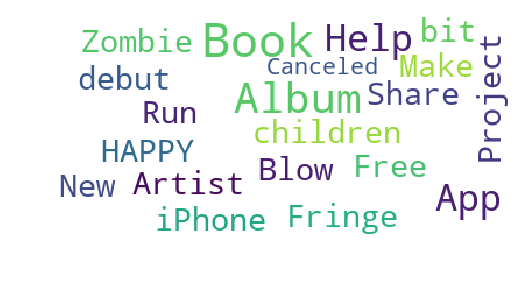

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=20,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(passed['name']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word_passed_name.png", dpi=900)

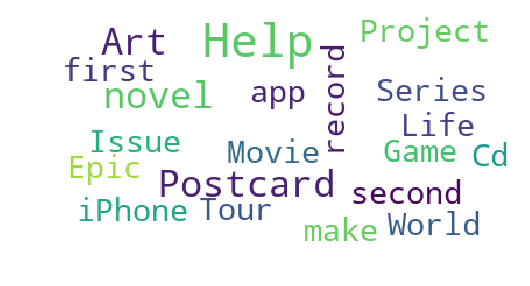

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=20,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(not_passed['name']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word_notpassed_name.png", dpi=900)

In [13]:
passed.describe()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,7.356800e+04,7.356800e+04,7.356800e+04,7.356800e+04,7.356800e+04,73568.000000,73568.0
mean,4.937259e+04,1.383850e+09,1.383710e+09,1.377738e+09,1.380829e+09,29.341534,0.0
std,1.177843e+06,4.241354e+07,4.236889e+07,4.257824e+07,4.267532e+07,116.488474,0.0
min,1.000000e+00,1.242429e+09,1.241574e+09,1.240335e+09,1.240976e+09,0.000000,0.0
25%,2.200000e+03,1.350925e+09,1.350868e+09,1.343832e+09,1.348024e+09,1.000000,0.0
50%,5.400000e+03,1.401996e+09,1.401908e+09,1.393789e+09,1.399286e+09,5.000000,0.0
75%,1.500000e+04,1.417804e+09,1.417633e+09,1.412042e+09,1.414791e+09,24.000000,0.0
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,8928.000000,0.0


In [14]:
from __future__ import division
from copy import deepcopy
import scipy.stats as stats
import pylab as pl

sorted_h = deepcopy(passed['goal'])


In [15]:
sorted_h.sort_values(inplace=True)

In [16]:
sorted_h

9792              1.0
68319             1.0
79336             1.0
67497             1.0
107725            1.0
26140             1.0
67064             1.0
102449            1.0
68832             1.0
87052             1.0
96736             1.0
68854             1.0
99024             1.0
99863             1.0
79786             1.0
83338             1.0
9825              1.0
91244             1.0
16158             1.0
107865            1.0
77447             1.0
81617             1.0
15188             1.0
762               1.0
67737             1.0
70228             1.0
84987             1.0
86883             1.0
77536             1.0
24334             1.0
             ...     
36584      11000000.0
99167      15000000.0
105057     15000000.0
34116      16000000.0
105272     16250000.0
92654      17400000.0
37269      20000000.0
36569      20000000.0
72267      21000000.0
35625      21474836.0
23522      21474836.0
82180      22000000.0
76303      25000000.0
83606      25000000.0
87725     

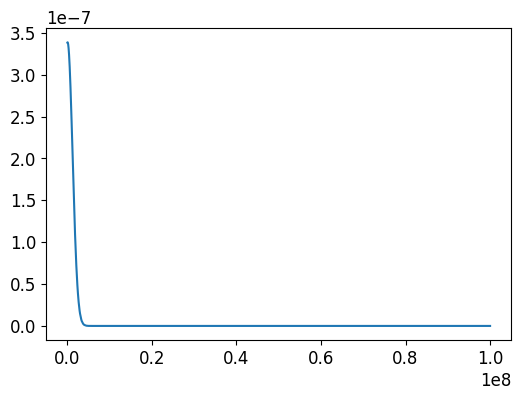

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt
hmean = np.mean(sorted_h)
hstd = np.std(sorted_h)
pdf = stats.norm.pdf(sorted_h, hmean, hstd)
plt.plot(sorted_h, pdf) # including h here is crucial
plt.show()

In [18]:
counts = sorted_h.value_counts()
counts

5000.00        6283
10000.00       5018
3000.00        3203
1000.00        3159
2000.00        2982
15000.00       2604
2500.00        2500
20000.00       2427
1500.00        2051
25000.00       2023
500.00         1995
50000.00       1891
4000.00        1667
6000.00        1531
3500.00        1495
30000.00       1376
8000.00        1353
7000.00        1023
7500.00        1019
100000.00       985
12000.00        943
35000.00        658
5500.00         602
4500.00         593
40000.00        591
1200.00         573
300.00          495
6500.00         487
600.00          463
800.00          454
               ... 
1138.00           1
4673.00           1
3570.00           1
11748.00          1
22000000.00       1
672.00            1
144.00            1
73.00             1
16000000.00       1
299000.00         1
149476.00         1
5371.00           1
4675.00           1
431000.00         1
2341.00           1
62064.00          1
15100.00          1
1683.00           1
8000000.00        1


In [19]:
test_data

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500.0,the-hornets-nest-the-fairmont-heights-story,False,US,USD,1451780700,1451780700,1448581356,1448672128
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000.0,brothers-season-2-groundbreaking-transgender-male,False,US,USD,1445021518,1445021530,1440966830,1442429518
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000.0,blackdom-the-movie,False,US,USD,1462068840,1462068844,1455765276,1458334890
5,kkst994744324,Hero's Battle: The Movie produced by Fish4Him ...,Sexual immorality is Satan's weapon to wage wa...,10000.0,heros-battle-the-movie,False,US,USD,1461777994,1461777994,1458171626,1459185994
6,kkst366471810,Limbo Film Project - 213 lives of Julia,Film focuses on connection between social alie...,1000.0,limbo-film-project-213-lives-of-julia,False,IT,EUR,1450087423,1450087423,1446994619,1447495423
7,kkst1686645245,Traffic (A Short Film),Paris is hired by a jazz singer to kill an old...,300.0,traffic-a-short-film,False,GB,GBP,1456516800,1456516801,1450964837,1451340184
8,kkst1009612119,Modern Gangsters,new web series created by jonney terry,6000.0,modern-gangsters,False,US,USD,1444337940,1444337941,1441745957,1441750564
9,kkst774947236,KISS ME GOODBYE - A REFRESHING VOICE IN INDIE ...,A martyr faces execution at the hands of the S...,8000.0,kiss-me-goodbye-a-new-voice-in-indie-filmmaking,False,US,USD,1444144222,1444144223,1438886415,1441120222


In [20]:
pd.DataFrame.describe(train_data)

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


In [21]:
pd.DataFrame.describe(test_data)

,goal,deadline,state_changed_at,created_at,launched_at
count,6.346500e+04,6.346500e+04,6.346500e+04,6.346500e+04,6.346500e+04
mean,3.532372e+04,1.459009e+09,1.458278e+09,1.451771e+09,1.456135e+09
std,1.206678e+06,1.638850e+07,1.571211e+07,1.983827e+07,1.641921e+07
min,1.000000e+00,1.433117e+09,1.428069e+09,1.266343e+09,1.427940e+09
25%,2.000000e+03,1.444522e+09,1.444419e+09,1.438098e+09,1.441756e+09
50%,6.000000e+03,1.458415e+09,1.458254e+09,1.452243e+09,1.455635e+09
75%,2.000000e+04,1.472587e+09,1.470672e+09,1.466366e+09,1.469650e+09
max,1.000000e+08,1.490916e+09,1.490915e+09,1.490228e+09,1.490297e+09


In [22]:
len(train_data[train_data['final_status'] == 0])

73568

In [23]:
len(train_data[train_data['final_status'] == 1])

34561

In [24]:
train_data.corr(method = 'pearson')

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
goal,1.000000,-0.000602,0.021468,0.021179,0.020937,0.020859,0.008733,-0.018984
disable_communication,-0.000602,1.000000,0.046417,0.043782,0.048588,0.046166,-0.003294,-0.037517
deadline,0.021468,0.046417,1.000000,0.999930,0.984109,0.999674,0.005281,-0.123052
state_changed_at,0.021179,0.043782,0.999930,1.000000,0.984029,0.999641,0.005501,-0.121628
created_at,0.020937,0.048588,0.984109,0.984029,1.000000,0.984558,0.001053,-0.126394
launched_at,0.020859,0.046166,0.999674,0.999641,0.984558,1.000000,0.005357,-0.119916
backers_count,0.008733,-0.003294,0.005281,0.005501,0.001053,0.005357,1.000000,0.116764
final_status,-0.018984,-0.037517,-0.123052,-0.121628,-0.126394,-0.119916,0.116764,1.000000


In [25]:
np.unique(train_data['backers_count'])

array([     0,      1,      2, ...,  87142, 105857, 219382], dtype=int64)

In [26]:
import xgboost as xgb

D:\softwares\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
X_train = train_data.drop(['final_status', 'project_id', 'name', 'desc', 'keywords'], 1)
print(X_train)
X_test = test_data.drop(['project_id', 'name', 'desc', 'keywords'], 1)

           goal disable_communication country currency    deadline  \
0          20.0                 False      US      USD  1241333999   
1         300.0                 False      US      USD  1242429000   
2          30.0                 False      US      USD  1243027560   
3         500.0                 False      US      USD  1243555740   
4        2000.0                 False      US      USD  1243769880   
5         700.0                 False      US      USD  1243815600   
6         250.0                 False      US      USD  1243872000   
7        1000.0                 False      US      USD  1244088000   
8        5000.0                 False      US      USD  1244264400   
9        3500.0                 False      US      USD  1244946540   
10      30000.0                 False      US      USD  1245026160   
11        300.0                 False      US      USD  1245038400   
12       1500.0                 False      US      USD  1245042600   
13        500.0     

In [29]:
# encode string class values as integers
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder = label_encoder.fit(X_train['country'])
label_encoded_country = label_encoder.transform(X_train['country'])

label_encoder = label_encoder.fit(X_train['currency'])
label_encoded_currency = label_encoder.transform(X_train['currency'])

print(np.unique(label_encoded_currency))
print(np.unique(label_encoded_country))

X_train['label_encoded_country'] = label_encoded_country
X_train['label_encoded_currency'] = label_encoded_currency

X_train.drop(['country', 'currency'], 1, inplace=True)

[0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8  9 10]


In [30]:
# Preparing test data similar to train data

label_encoder = label_encoder.fit(X_test['country'])
label_encoded_country = label_encoder.transform(X_test['country'])
label_encoder = label_encoder.fit(X_test['currency'])
label_encoded_currency = label_encoder.transform(X_test['currency'])
X_test['label_encoded_country'] = label_encoded_country
X_test['label_encoded_currency'] = label_encoded_currency
X_test.drop(['country', 'currency'], 1, inplace=True)

In [31]:
Y_train = train_data.final_status
Y_train

0         1
1         0
2         0
3         1
4         0
5         0
6         0
7         1
8         0
9         0
10        0
11        0
12        1
13        1
14        0
15        1
16        0
17        1
18        0
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        0
27        1
28        1
29        1
         ..
108099    0
108100    1
108101    1
108102    0
108103    0
108104    0
108105    0
108106    0
108107    0
108108    0
108109    0
108110    0
108111    0
108112    0
108113    0
108114    0
108115    0
108116    0
108117    0
108118    0
108119    0
108120    0
108121    0
108122    1
108123    1
108124    0
108125    0
108126    1
108127    0
108128    0
Name: final_status, dtype: int64

In [32]:
# creating new feature
time_to_finish = train_data['deadline'] - train_data['launched_at']

In [33]:
time_to_finish_test = test_data['deadline'] - test_data['launched_at']

In [34]:
X_train['ttf'] = time_to_finish

In [35]:
X_test['ttf'] = time_to_finish_test

In [36]:
X_train.drop(['backers_count'], 1, inplace=True)

In [37]:
X_train.drop(['deadline', 'state_changed_at', 'created_at', 'launched_at'], 1, inplace=True)
X_test.drop(['deadline', 'state_changed_at', 'created_at', 'launched_at'], 1, inplace=True)

In [38]:
import math
days = X_train['ttf']/86400

In [39]:
days.astype(np.int64)
X_train['amount_per_day'] = X_train['goal']/days

In [40]:
days_test = X_test['ttf']/86400
days_test.astype(np.int64)
X_test['amount_per_day'] = X_test['goal']/days

In [41]:
# for submission 5
X_train_5 = X_train.drop('goal', 1)
X_test_5 = X_test.drop('goal', 1)

In [42]:
X_train_6 = deepcopy(X_train_5)
X_test_6 = deepcopy(X_test_5)

In [43]:
X_train_6['desc_len'] = desc_len_train
X_test_6['desc_len'] = desc_len_test

# Training 7 - best

In [44]:
X_train_7 = deepcopy(X_train_6)
X_test_7 = deepcopy(X_test_6)
X_train_7['dtf'] = X_train_7['ttf']/86400
X_test_7['dtf'] = X_test_7['ttf']/86400

In [45]:
X_train_7.drop('ttf', 1, inplace = True)


In [46]:
X_test_7.drop('ttf', 1, inplace = True)

# not a good submission - 8 (removing currency)

In [515]:
X_train_8 = deepcopy(X_train_7)
X_test_8 = deepcopy(X_test_7)
X_train_8['dtf'] = X_train_8['dtf'].astype(np.int64)
X_test_8['dtf'] = X_test_8['dtf'].astype(np.int64)

In [516]:
X_train_8['amount_per_day'] = X_train_8['amount_per_day'].astype(np.int64)
X_test_8['amount_per_day'] = X_test_8['amount_per_day'].astype(np.int64)

In [517]:
X_train_8.drop('label_encoded_currency', 1)
X_test_8.drop('label_encoded_currency', 1)

,disable_communication,label_encoded_country,amount_per_day,desc_len,dtf
0,False,20,827,119.0,40
1,False,20,2080,119.0,35
2,False,20,4954,126.0,35
3,False,20,1334,108.0,30
4,False,20,667,132.0,43
5,False,20,367,125.0,30
6,False,12,40,125.0,30
7,False,9,9,114.0,59
8,False,20,186,38.0,29
9,False,20,258,115.0,35


# submission 11 - adding keyword lengths - best

In [47]:
X_train_11 = deepcopy(X_train_7)
X_test_11 = deepcopy(X_test_7)

key_lens_train_series = pd.Series(key_lens_train)
X_train_11['key_lens'] = key_lens_train_series.values

key_lens_test_series = pd.Series(key_lens_test)
X_test_11['key_lens'] = key_lens_test_series.values

# submission 12 - adding wordcloud results - latest best

In [48]:
X_train_12 = deepcopy(X_train_11)
X_test_12 = deepcopy(X_test_11)

X_train_12['name'] = train_data['name']
X_train_12['name'].str.lower()

X_test_12['name'] = test_data['name']
X_test_12['name'].str.lower()

0                                                bràthair.
1                                         the screenwriter
2              the hornets nest the fairmont heights story
3        brothers season 2 - groundbreaking transgender...
4                                       blackdom the movie
5        hero's battle: the movie produced by fish4him ...
6                  limbo film project - 213 lives of julia
7                                   traffic (a short film)
8                                         modern gangsters
9        kiss me goodbye - a refreshing voice in indie ...
10       """"""""""""""""""""""""""""""""""""""""""""""...
11                                   like son, like father
12       pre-production - the heart of a woman & the he...
13          the ecstasy of vengeance - feature length film
14               hart blvd. a feature film by andrew greve
15                                         invisible scars
16                                             true colo

In [49]:
words_name_passed = ['zombie', 'book', 'album', 'children', 'app', 'fringe', 'share']
words_name_notpassed = ['art', 'novel', 'postcard', 'game', 'life', 'series', 'world', 'tour', 'issue', 'movie']

In [50]:
train_passed = []
train_nonpassed = []

miss_train_pass = 0
miss_train_pass_list = []
for idx, name in enumerate(X_train_12['name']):
    try:
        if any(word in name for word in words_name_passed):
            train_passed.append(1)
        else:
            train_passed.append(0)
    except:
        miss_train_pass+=1
        miss_train_pass_list.append(idx)
        continue

miss_train_fail = 0
miss_train_fail_list = []
for idx, name in enumerate(X_train_12['name']):
    try:
        if any(word in name for word in words_name_notpassed):
            train_nonpassed.append(1)
        else:
            train_nonpassed.append(0)
    except:
        train_passed.append(0)
        train_nonpassed.append(0)
        miss_train_fail +=1
        miss_train_fail_list.append(idx)
        continue

In [51]:
test_passed = []
test_nonpassed = []

miss_test_pass = 0
miss_test_pass_list = []
for idx, name in enumerate(X_test_12['name']):
    try:
        if any(word in name for word in words_name_passed):
            test_passed.append(1)
        else:
            test_passed.append(0)
    except:
        miss_test_pass+=1
        miss_test_pass_list.append(idx)
        continue

miss_test_fail = 0
miss_test_fail_list = []
for idx, name in enumerate(X_test_12['name']):
    try:
        if any(word in name for word in words_name_notpassed):
            test_nonpassed.append(1)
        else:
            test_nonpassed.append(0)
    except:
        test_passed.append(0)
        test_nonpassed.append(0)
        miss_test_fail +=1
        miss_test_fail_list.append(idx)
        continue

In [52]:
# X_train_12['contains_probable_password_in_name'] = train_passed
X_train_12['contains_probable_nonpassword_in_name'] = train_nonpassed

In [53]:
# X_test_12['contains_probable_password_in_name'] = test_passed
X_test_12['contains_probable_nonpassword_in_name'] = test_nonpassed

In [54]:
X_train_12.drop('name', 1, inplace=True)

In [55]:
X_test_12.drop('name', 1, inplace=True)

In [56]:
X_test_12

,disable_communication,label_encoded_country,label_encoded_currency,amount_per_day,desc_len,dtf,key_lens,contains_probable_nonpassword_in_name
0,False,20,12,827.047517,119.0,40.041667,1,0
1,False,20,12,2080.627050,119.0,35.000000,2,0
2,False,20,12,4954.805703,126.0,35.978843,7,0
3,False,20,12,1334.873175,108.0,30.000000,6,0
4,False,20,12,667.351784,132.0,43.217014,3,1
5,False,20,12,367.482557,125.0,30.000000,4,0
6,False,12,4,40.455272,125.0,30.000000,7,0
7,False,9,5,9.901788,114.0,59.914537,4,0
8,False,20,12,186.240412,38.0,29.946481,2,0
9,False,20,12,258.578120,115.0,35.000000,9,0


# submission 17 - adding status changed before/after - bad

In [321]:
X_train_17 = deepcopy(X_train_12)
X_test_17 = deepcopy(X_train_12)

X_train_17['status_change'] = train_data['state_changed_at']
X_test_17['status_change'] = train_data['state_changed_at']
X_train_17['deadline'] = train_data['deadline']
X_test_17['deadline'] = test_data['deadline']

In [325]:
X_train_17['status_change_when'] = X_train_17['status_change'] < X_train_17['deadline']

In [328]:
X_test_17['status_change_when'] = X_test_17['status_change'] < X_test_17['deadline']

In [327]:
np.unique(X_train_17['status_change_when'])

array([False,  True], dtype=bool)

In [341]:
X_test_17.drop(['deadline', 'status_change'], 1, inplace=True)
X_train_17.drop(['deadline', 'status_change'], 1, inplace=True)

# submission 19.1 - adding days to review - good gain - latest best

In [57]:
X_train_19_1 = deepcopy(X_train_12)
X_test_19_1 = deepcopy(X_test_12)

X_train_19_1['dtr'] = train_data['launched_at'] - train_data['created_at']
X_test_19_1['dtr'] = test_data['launched_at'] - test_data['created_at']

X_train_19_1['dtr'] = X_train_19_1['dtr']/86400
X_test_19_1['dtr'] = X_test_19_1['dtr']/86400

In [58]:
X_test_19_1

,disable_communication,label_encoded_country,label_encoded_currency,amount_per_day,desc_len,dtf,key_lens,contains_probable_nonpassword_in_name,dtr
0,False,20,12,827.047517,119.0,40.041667,1,0,1.817176
1,False,20,12,2080.627050,119.0,35.000000,2,0,1.322882
2,False,20,12,4954.805703,126.0,35.978843,7,0,1.050602
3,False,20,12,1334.873175,108.0,30.000000,6,0,16.929259
4,False,20,12,667.351784,132.0,43.217014,3,1,29.740903
5,False,20,12,367.482557,125.0,30.000000,4,0,11.740370
6,False,12,4,40.455272,125.0,30.000000,7,0,5.796343
7,False,9,5,9.901788,114.0,59.914537,4,0,4.344294
8,False,20,12,186.240412,38.0,29.946481,2,0,0.053322
9,False,20,12,258.578120,115.0,35.000000,9,0,25.854248


# submission 20 - adding month - bad

In [105]:
X_train_20 = deepcopy(X_train_19_1)
X_test_20 = deepcopy(X_test_19_1)

X_train_20['launched_at'] = train_data['launched_at']
X_test_20['launched_at'] = test_data['launched_at']

In [106]:
X_train_20['launched_at'] = X_train_20['launched_at'].apply(convert_to_datetime)
X_test_20['launched_at'] = X_test_20['launched_at'].apply(convert_to_datetime)

In [107]:
X_train_20['launched_at_month'] = X_train_20['launched_at'].dt.month
X_test_20['launched_at_month'] = X_test_20['launched_at'].dt.month


In [108]:
X_train_20.drop('launched_at', 1, inplace=True)
X_test_20.drop('launched_at', 1, inplace=True)


# submission 21 - removing disable comm - bad

In [121]:
X_train_21 = deepcopy(X_train_19_1)
X_test_21 = deepcopy(X_test_19_1)
X_train_21.drop('disable_communication', 1, inplace=True)
X_test_21.drop('disable_communication', 1, inplace=True)

# submission 24 - diff between state change and launch - latest best - 68.842

In [59]:
X_train_24 = deepcopy(X_train_19_1)
X_test_24 = deepcopy(X_test_19_1)

X_train_24['diff_dl_dsc'] = train_data['state_changed_at'] - train_data['launched_at']

X_test_24['diff_dl_dsc'] = test_data['state_changed_at'] - test_data['launched_at']

In [60]:
X_train_24['diff_dl_dsc'] = X_train_24['diff_dl_dsc']/84600
X_test_24['diff_dl_dsc'] = X_test_24['diff_dl_dsc']/84600

In [61]:
X_train_24.drop('contains_probable_nonpassword_in_name', 1, inplace=True)
X_test_24.drop('contains_probable_nonpassword_in_name', 1, inplace=True)

# submission 29 - rounding up features - bad

In [149]:
X_train_29 = deepcopy(X_train_24)
X_test_29 = deepcopy(X_test_24)

In [150]:

X_train_29['dtf'] = X_train_29['dtf'].round()
X_train_29['dtr'] = X_train_29['dtr'].round()
X_train_29['diff_dl_dsc'] = X_train_29['diff_dl_dsc'].round()

In [151]:

X_test_29['dtf'] = X_test_29['dtf'].round()
X_test_29['dtr'] = X_test_29['dtr'].round()
X_test_29['diff_dl_dsc'] = X_test_29['diff_dl_dsc'].round()

In [138]:
X_test_29

,disable_communication,label_encoded_country,label_encoded_currency,amount_per_day,desc_len,dtf,key_lens,dtr,diff_dl_dsc
0,False,20,12,827.0,119.0,40.0,1,2.0,41.0
1,False,20,12,2081.0,119.0,35.0,2,1.0,36.0
2,False,20,12,4955.0,126.0,36.0,7,1.0,37.0
3,False,20,12,1335.0,108.0,30.0,6,17.0,31.0
4,False,20,12,667.0,132.0,43.0,3,30.0,44.0
5,False,20,12,367.0,125.0,30.0,4,12.0,31.0
6,False,12,4,40.0,125.0,30.0,7,6.0,31.0
7,False,9,5,10.0,114.0,60.0,4,4.0,61.0
8,False,20,12,186.0,38.0,30.0,2,0.0,31.0
9,False,20,12,259.0,115.0,35.0,9,26.0,36.0


# submission 28 - adding diff state change and deadline - bad

In [100]:
X_train_28 = deepcopy(X_train_24)
X_test_28 = deepcopy(X_test_24)

X_train_28['diff_dead_dsc'] = train_data['state_changed_at'] - train_data['deadline']

X_test_28['diff_dead_dsc'] = test_data['state_changed_at'] - test_data['deadline']

X_train_28['diff_dead_dsc'] = X_train_28['diff_dead_dsc']/84600
X_test_28['diff_dead_dsc'] = X_test_28['diff_dead_dsc']/84600

# submission 27 - adding if desc contains link - bad

In [72]:
X_train_27 = deepcopy(X_train_24)
X_test_27 = deepcopy(X_test_24)

X_train_27['desc'] = train_data['desc']
X_test_27['desc'] = test_data['desc']

In [84]:
url_words = ['www', 'http', 'https', '.com', '.org', '.in', '.de']
def contains_link(desc):
    link_present = False
    try:
        if any(url_word in desc for url_word in url_words):
            link_present = True
    except:
        link_present = False
    return link_present

In [85]:
X_train_27['contains_link'] = X_train_27['desc'].apply(contains_link)

In [87]:
X_test_27['contains_link'] = X_test_27['desc'].apply(contains_link)

In [88]:
X_train_27.drop('desc', 1, inplace=True)
X_test_27.drop('desc', 1, inplace=True)

# submission 19 - adding categories

In [57]:
X_train_19 = deepcopy(X_train_12)
X_test_19 = deepcopy(X_test_12)

X_train_19['desc'] = train_data['desc']
X_test_19['desc'] = test_data['desc']

X_train_19['desc'] = X_train_19['desc'].str.lower()
X_test_19['desc'] = X_test_19['desc'].str.lower()

In [204]:
category = ['Art', 'Comic', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film', 'Video','Food', 'Game', 'Journalism', 'Music', 'Photograph', 'Publishing', 'Technology', 'Theater']


In [20]:
import scipy

ModuleNotFoundError: No module named 'numpy'

In [9]:
import numpy
from gensim.models.keyedvectors import KeyedVectors

model = KeyedVectors.load_word2vec_format('D:\\data science\\Hackerearth\\ML challenge - project funding\\dfb976d0-5-datafiles\\GoogleNews-vectors-negative300.gz', binary=True)
#model.save_word2vec_format('GoogleNews-vectors-negative300.txt', binary=False)

In [25]:
text = ['drawing','pictures', 'color','draw']

In [30]:
text1 = train_data['desc'][0].split(' ')

In [55]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
stop = stopwords.words('english') + list(string.punctuation)

In [261]:
tokens = [i for i in word_tokenize(train_data['desc'][36].lower()) if i not in stop]
tokens_name = [i for i in word_tokenize(train_data['name'][36].lower()) if i not in stop]

In [262]:
tokens = tokens + tokens_name

In [263]:
tagged = nltk.pos_tag(tokens)

In [264]:
tagged = [t for t in tagged if t[1].startswith('N')]

In [265]:
tagged

[('polyvinyl', 'NN'),
 ('help', 'NN'),
 ('distributor’s', 'NN'),
 ('destroy', 'NN'),
 ('help', 'NN'),
 ('records', 'NNS'),
 ('destruction', 'NN')]

In [266]:
tagged = [t[0] for t in tagged]
tagged

['polyvinyl',
 'help',
 'distributor’s',
 'destroy',
 'help',
 'records',
 'destruction']

In [267]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [268]:
tagged = [lmtzr.lemmatize(word) for word in tagged]
tagged

['polyvinyl',
 'help',
 'distributor’s',
 'destroy',
 'help',
 'record',
 'destruction']

In [270]:
for cat in category:
    total_weight = 0
    for word in tagged:
        try:
            total_weight += model.similarity(cat, word)
        except:
            continue
    print('category: ', cat, ' weight: ', total_weight)

category:  Art  weight:  0.23244449726
category:  Comic  weight:  0.335328973536
category:  Crafts  weight:  0.281112882439
category:  Dance  weight:  0.211095712418
category:  Design  weight:  0.253186039504
category:  Fashion  weight:  -0.00971364315217
category:  Film  weight:  0.142309404359
category:  Video  weight:  0.329321703073
category:  Food  weight:  0.277143186387
category:  Game  weight:  0.236293289894
category:  Journalism  weight:  0.0282899619237
category:  Music  weight:  0.216871966089
category:  Photograph  weight:  0.157164063826
category:  Publishing  weight:  0.228945131923
category:  Technology  weight:  0.276426859542
category:  Theater  weight:  0.0714710083908


In [239]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [369]:
import nltk
from nltk.corpus import wordnet as wn
music = wn.synsets('publish')
print(music[1].hyponyms())

[Synset('edit.v.02')]


In [296]:
text = ['web', 'crime thriller','many','come', 'Trying','pursue','passion', 'student' 'filmmaker', 'Disneyland', 'employee' , 'full', 'time' ,'dreamer']

In [326]:
from nltk.corpus import wordnet
cb = wordnet.synset('thrill.n.03')
ib = wordnet.synset('film.n.04')
cb.wup_similarity(ib)



0.13333333333333333

# training XGBoost old

## training on train data

In [152]:
import time
print('traning model...')
starttime = time.time()
model = XGBClassifier()
model.fit(X_train_29, Y_train)
endtime = time.time()
print('trained. time taken: ', str((endtime-starttime)))
print(model)

traning model...
trained. time taken:  1.3084137439727783
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


## making predictions

In [153]:
# make predictions for test data
Y_pred = model.predict(X_test_29)
predictions = [round(value) for value in Y_pred]
import collections
counter = collections.Counter(predictions)
counter

Counter({0: 58617, 1: 4848})

# training XGBoost new using GridCV

## finding right parameters

In [533]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

D:\softwares\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [534]:
optimized_GBM.fit(X_train_7, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [535]:
optimized_GBM.grid_scores_

[mean: 0.67808, std: 0.00775, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.67801, std: 0.00668, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.67754, std: 0.00755, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.66677, std: 0.01523, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.67353, std: 0.00856, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.67345, std: 0.00761, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.66029, std: 0.01744, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.66831, std: 0.00967, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.66831, std: 0.00953, params: {'max_depth': 7, 'min_child_weight': 5}]

In [536]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(X_train_7, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [537]:
optimized_GBM.grid_scores_

[mean: 0.67748, std: 0.00656, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.67808, std: 0.00775, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.67045, std: 0.01550, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.68072, std: 0.00463, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.68083, std: 0.00460, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.68107, std: 0.00434, params: {'learning_rate': 0.01, 'subsample': 0.9}]

## training on train data

In [162]:
# replace train with the right train data, Y_train will remain same
xgdmat = xgb.DMatrix(X_train_24, Y_train) # Create our DMatrix to make XGBoost more efficient

In [363]:

our_params = {'eta': 0.02, 'seed':0, 'subsample': 0.93, 'colsample_bytree': 0.93, 
             'objective': 'binary:logistic', 'max_depth':4, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [364]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
845,0.305045,0.002545,0.297336,0.000847
846,0.305026,0.002516,0.297330,0.000855
847,0.305027,0.002533,0.297309,0.000862
848,0.304952,0.002599,0.297302,0.000855
849,0.304934,0.002598,0.297283,0.000877


In [365]:
final_gb = xgb.train(our_params, xgdmat, num_boost_round = 849)

## feature importance

In [366]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

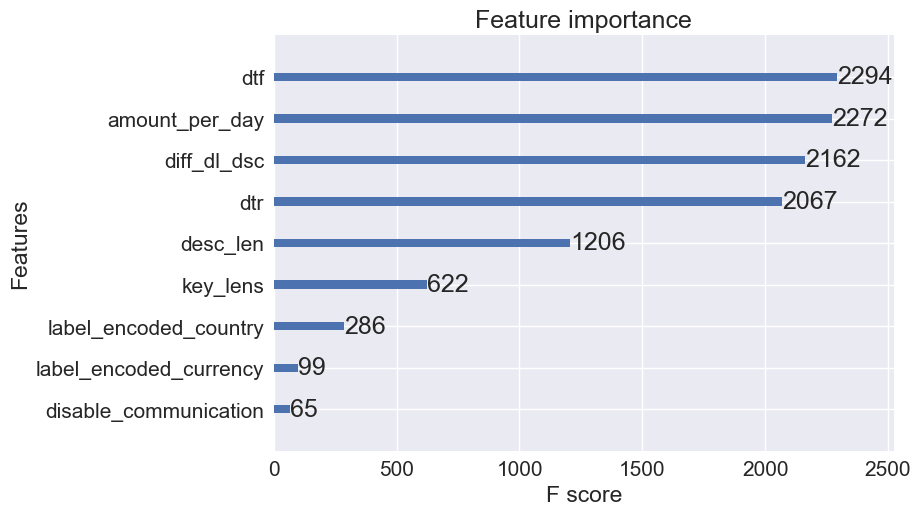

In [367]:
xgb.plot_importance(final_gb)

## testing model on test data and making predictions

In [224]:
# change test data to correct version
testdmat = xgb.DMatrix(X_test_19_1)

In [225]:
from sklearn.metrics import accuracy_score
y_pred_finalgb = final_gb.predict(testdmat) # Predict using our testdmat


In [226]:
predictions = [round(value) for value in y_pred_finalgb]

In [227]:
import collections
counter = collections.Counter(predictions)
counter

Counter({0.0: 57408, 1.0: 6057})

# multi-layer perceptron

In [81]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
from keras_tqdm import TQDMNotebookCallback
from keras import optimizers
import numpy
import pandas
# fix random seed for reproducibility
numpy.random.seed(7)

# create model
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
# Fit the model
model.fit(X_train_24.as_matrix(), Y_train.as_matrix(), epochs=15, batch_size=1,verbose = 0, callbacks=[TQDMNotebookCallback()])
# evaluate the model
scores = model.evaluate(X_train_24.as_matrix(), Y_train.as_matrix())
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

8890/|/[loss: nan, acc: 0.105]   8%|| 8890/108129 [00:19<00:30, 3226.17it/s]                                           

KeyboardInterrupt: 

In [83]:
model.predict(Y_train)

ValueError: Error when checking : expected dense_52_input to have shape (None, 9) but got array with shape (108129, 1)

In [63]:
import pandas as pd

In [205]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train_19_1.as_matrix(), Y_train.as_matrix(), epochs=5, batch_size=1, verbose=0)

In [218]:
model.get_weights()

[array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan]], dtype=float32),
 array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan], dtype=float32),
 array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
 

In [211]:
Y_pred

array([[ nan],
       [ nan],
       [ nan],
       ..., 
       [ nan],
       [ nan],
       [ nan]], dtype=float32)

# displaying train and test dataframes

In [103]:
X_train_28

,disable_communication,label_encoded_country,label_encoded_currency,amount_per_day,desc_len,dtf,key_lens,dtr,diff_dl_dsc,diff_dead_dsc
0,False,10,8,2.362993,134.0,8.463843,3,0.025648,8.644137,0.000213
1,False,10,8,17.833946,137.0,16.821852,10,0.177870,17.215437,0.035674
2,False,10,8,3.002913,385.0,9.990301,2,0.009086,10.205910,0.003050
3,False,10,8,16.685915,131.0,29.965394,6,0.033970,30.607459,0.004504
4,False,10,8,66.735178,384.0,29.969201,6,0.030405,30.612009,0.005165
5,False,10,8,25.723779,131.0,27.212176,2,4.787836,27.798475,0.007317
6,False,10,8,10.113818,134.0,24.718657,4,0.128889,25.244917,0.000331
7,False,10,8,33.005961,136.0,30.297558,5,0.112847,30.942447,0.000260
8,False,10,8,155.200343,133.0,32.216424,4,0.760845,32.902139,0.000260
9,False,10,8,113.127927,131.0,30.938426,8,0.061377,31.597778,0.001087


In [104]:
X_test_28

,disable_communication,label_encoded_country,label_encoded_currency,amount_per_day,desc_len,dtf,key_lens,dtr,diff_dl_dsc,diff_dead_dsc
0,False,20,12,827.047517,119.0,40.041667,1,1.817176,40.893617,0.000000
1,False,20,12,2080.627050,119.0,35.000000,2,1.322882,35.744681,0.000000
2,False,20,12,4954.805703,126.0,35.978843,7,1.050602,36.744350,0.000000
3,False,20,12,1334.873175,108.0,30.000000,6,16.929259,30.638440,0.000142
4,False,20,12,667.351784,132.0,43.217014,3,29.740903,44.136572,0.000047
5,False,20,12,367.482557,125.0,30.000000,4,11.740370,30.638298,0.000000
6,False,12,4,40.455272,125.0,30.000000,7,5.796343,30.638298,0.000000
7,False,9,5,9.901788,114.0,59.914537,4,4.344294,61.189326,0.000012
8,False,20,12,186.240412,38.0,29.946481,2,0.053322,30.583652,0.000012
9,False,20,12,258.578120,115.0,35.000000,9,25.854248,35.744693,0.000012


# Preparing submission file 

In [154]:
se = pd.Series(predictions)

In [155]:
s1 = test_data['project_id']

In [156]:
final = s1.to_frame().join(se.to_frame())

In [157]:
final

,project_id,0
0,kkst917493670,0
1,kkst1664901914,0
2,kkst925125077,0
3,kkst1427645275,0
4,kkst1714249266,0
5,kkst994744324,0
6,kkst366471810,0
7,kkst1686645245,0
8,kkst1009612119,0
9,kkst774947236,0


In [158]:
final.to_csv('final_submission29.csv')

In [159]:
len(test_data)

63465

In [160]:
len(final)

63465

In [161]:
np.unique(final[0])

array([0, 1], dtype=int64)